In [67]:
import os
import datetime


import numpy as np
from numpy import nan

import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout


seed_value= 3
os.environ['PYTHONHASHSEED']=str(seed_value)


In [2]:
#read data 
m1 = pd.read_csv('42.csv', parse_dates=True)
m2 = pd.read_csv('8.csv', parse_dates=True)
m3 = pd.read_csv('10.csv', parse_dates=True)
m4 = pd.read_csv('21.csv', parse_dates=True)
m5 = pd.read_csv('25.csv', parse_dates=True)
m6 = pd.read_csv('29.csv', parse_dates=True)
m7 = pd.read_csv('45.csv', parse_dates=True)
m8 = pd.read_csv('55.csv', parse_dates=True)
m9 = pd.read_csv('78.csv', parse_dates=True)



In [3]:
m2.head()

,timestamp,dttm_utc,value,estimated,anomaly
0,1325376600,2012-01-01 00:10:00,20.9518,0,NaN
1,1325376900,2012-01-01 00:15:00,20.9518,0,NaN
2,1325377200,2012-01-01 00:20:00,27.9357,0,NaN
3,1325377500,2012-01-01 00:25:00,20.9518,0,NaN
4,1325377800,2012-01-01 00:30:00,13.9678,0,NaN


In [4]:
data = pd.concat([m1['dttm_utc'], m1['value'], m2['value'], m3['value'], m4['value'], m5['value'],
                  m6['value'], m7['value'], m8['value'], m9['value']], axis=1)  

In [5]:
data.head()

,dttm_utc,value,value,value,value,value,value,value,value,value
0,2012-01-01 00:10:00,60.3171,20.9518,105.7895,21.2887,20.6653,50.5458,105.9183,90.4052,52.1284
1,2012-01-01 00:15:00,59.7371,20.9518,104.7318,21.2887,20.6653,50.0598,104.8593,89.5013,51.6272
2,2012-01-01 00:20:00,57.4172,27.9357,102.2920,28.3850,27.5537,48.1157,102.4165,87.4163,49.6222
3,2012-01-01 00:25:00,56.8372,20.9518,102.7851,21.2887,20.6653,47.6297,102.9103,87.8377,49.1210
4,2012-01-01 00:30:00,59.1571,13.9678,101.6106,14.1925,13.7769,49.5738,101.7343,86.8340,51.1259


In [6]:
data.tail()  

,dttm_utc,value,value,value,value,value,value,value,value,value
105402,2012-12-31 23:40:00,128.7538,27.9357,165.1246,28.3850,27.5537,107.8959,165.3256,141.1115,111.2741
105403,2012-12-31 23:45:00,126.4339,27.9357,161.1274,28.3850,27.5537,105.9518,161.3235,137.6956,109.2692
105404,2012-12-31 23:50:00,126.4339,20.9518,163.7619,21.2887,20.6653,105.9518,163.9612,139.9470,109.2692
105405,2012-12-31 23:55:00,128.1738,27.9357,161.0755,28.3850,27.5537,107.4098,161.2715,137.6512,110.7729
105406,2013-01-01 00:00:00,127.5938,27.9357,151.6340,28.3850,27.5537,106.9238,151.8186,129.5828,110.2716


In [7]:
data.set_index(['dttm_utc'], inplace = True)

In [8]:
data.head()

,value,value,value,value,value,value,value,value,value
dttm_utc,,,,,,,,,
2012-01-01 00:10:00,60.3171,20.9518,105.7895,21.2887,20.6653,50.5458,105.9183,90.4052,52.1284
2012-01-01 00:15:00,59.7371,20.9518,104.7318,21.2887,20.6653,50.0598,104.8593,89.5013,51.6272
2012-01-01 00:20:00,57.4172,27.9357,102.2920,28.3850,27.5537,48.1157,102.4165,87.4163,49.6222
2012-01-01 00:25:00,56.8372,20.9518,102.7851,21.2887,20.6653,47.6297,102.9103,87.8377,49.1210
2012-01-01 00:30:00,59.1571,13.9678,101.6106,14.1925,13.7769,49.5738,101.7343,86.8340,51.1259


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 105407 entries, 2012-01-01 00:10:00 to 2013-01-01 00:00:00
Data columns (total 9 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   value   105407 non-null  float64
 1   value   105407 non-null  float64
 2   value   105407 non-null  float64
 3   value   105407 non-null  float64
 4   value   105407 non-null  float64
 5   value   105407 non-null  float64
 6   value   105407 non-null  float64
 7   value   105407 non-null  float64
 8   value   105407 non-null  float64
dtypes: float64(9)
memory usage: 8.0+ MB


In [10]:
np.isnan(data).sum()

value    0
value    0
value    0
value    0
value    0
value    0
value    0
value    0
value    0
dtype: int64

In [11]:
data.to_csv('Shopp_mall_cleaned_data.csv')

In [12]:
data = pd.read_csv('Shopp_mall_cleaned_data.csv', parse_dates = True, index_col = 'dttm_utc', low_memory = False)

In [13]:
data.tail()

,value,value.1,value.2,value.3,value.4,value.5,value.6,value.7,value.8
dttm_utc,,,,,,,,,
2012-12-31 23:40:00,128.7538,27.9357,165.1246,28.3850,27.5537,107.8959,165.3256,141.1115,111.2741
2012-12-31 23:45:00,126.4339,27.9357,161.1274,28.3850,27.5537,105.9518,161.3235,137.6956,109.2692
2012-12-31 23:50:00,126.4339,20.9518,163.7619,21.2887,20.6653,105.9518,163.9612,139.9470,109.2692
2012-12-31 23:55:00,128.1738,27.9357,161.0755,28.3850,27.5537,107.4098,161.2715,137.6512,110.7729
2013-01-01 00:00:00,127.5938,27.9357,151.6340,28.3850,27.5537,106.9238,151.8186,129.5828,110.2716


In [14]:
#instead of every 15-minutes, transform data to points per day
data_d = data.resample('D').sum()

In [15]:
data_h = data.resample('H').sum()

In [16]:
data_h.head()

,value,value.1,value.2,value.3,value.4,value.5,value.6,value.7,value.8
dttm_utc,,,,,,,,,
2012-01-01 00:00:00,578.2318,209.5179,1022.1605,212.8871,206.6530,484.5593,1023.4048,873.5140,499.7308
2012-01-01 01:00:00,687.2666,251.4215,1209.2568,255.4645,247.9836,575.9306,1210.7288,1033.4020,593.9630
2012-01-01 02:00:00,688.4266,251.4216,1149.0716,255.4644,247.9836,576.9027,1150.4704,981.9690,594.9655
2012-01-01 03:00:00,686.1065,251.4216,1147.5338,255.4644,247.9836,574.9584,1148.9306,980.6549,592.9604
2012-01-01 04:00:00,675.0874,251.4216,1145.1784,255.4644,247.9836,565.7242,1146.5722,978.6417,583.4373


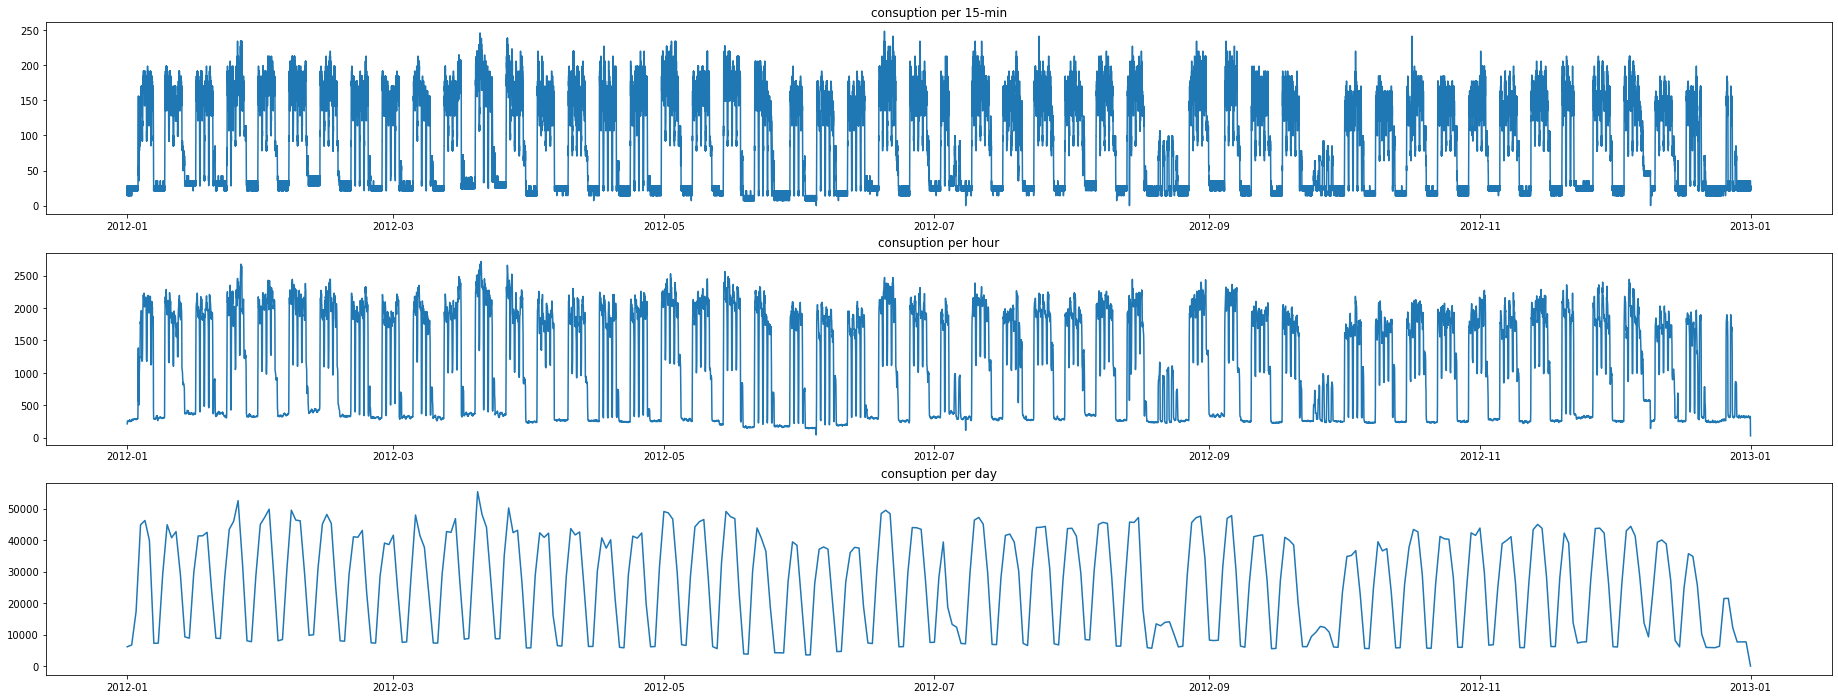

In [17]:
fig, ax = plt.subplots(figsize=(32,12))

plt.subplot(3, 1, 1)
plt.plot(data['value.3'])
plt.title('consuption per 15-min')

plt.subplot(3, 1, 2)
plt.plot(data_h['value.3'])
plt.title('consuption per hour')

plt.subplot(3, 1, 3)
plt.plot(data_d['value.3'])
plt.title('consuption per day')


plt.show()
fig.tight_layout()

In [18]:
data_d.head()

,value,value.1,value.2,value.3,value.4,value.5,value.6,value.7,value.8
dttm_utc,,,,,,,,,
2012-01-01,16740.3083,6055.0684,26529.9617,6152.4364,5972.2714,14028.4047,26562.2536,22671.8682,14467.6369
2012-01-02,17420.0359,6613.7820,52740.5243,6720.1386,6523.3436,14598.0200,52804.7192,45070.7859,15055.0865
2012-01-03,32592.1012,17138.5430,80725.7850,17414.1899,16904.2054,27312.2335,80824.0439,68986.3168,28167.3823
2012-01-04,35839.3633,44145.3578,88180.8553,44855.3901,43541.7615,30033.4439,88288.1884,75357.2414,30973.7950
2012-01-05,33888.3378,45493.2552,91087.9813,46224.9662,44871.2281,28398.4821,91198.8528,77841.6006,29287.6430


In [19]:
training = data_h.loc[:'2012-10-01', :]

In [20]:
training.head()

,value,value.1,value.2,value.3,value.4,value.5,value.6,value.7,value.8
dttm_utc,,,,,,,,,
2012-01-01 00:00:00,578.2318,209.5179,1022.1605,212.8871,206.6530,484.5593,1023.4048,873.5140,499.7308
2012-01-01 01:00:00,687.2666,251.4215,1209.2568,255.4645,247.9836,575.9306,1210.7288,1033.4020,593.9630
2012-01-01 02:00:00,688.4266,251.4216,1149.0716,255.4644,247.9836,576.9027,1150.4704,981.9690,594.9655
2012-01-01 03:00:00,686.1065,251.4216,1147.5338,255.4644,247.9836,574.9584,1148.9306,980.6549,592.9604
2012-01-01 04:00:00,675.0874,251.4216,1145.1784,255.4644,247.9836,565.7242,1146.5722,978.6417,583.4373


In [21]:
testing = data_h.loc['2012-10-01':, :]

In [22]:
testing.head()

,value,value.1,value.2,value.3,value.4,value.5,value.6,value.7,value.8
dttm_utc,,,,,,,,,
2012-10-01 00:00:00,571.2723,244.4376,3160.9870,248.3682,241.0952,478.7269,3164.8348,2701.3037,493.7160
2012-10-01 01:00:00,563.1528,244.4376,3325.3589,248.3682,241.0952,471.9228,3329.4065,2841.7719,486.6988
2012-10-01 02:00:00,563.7326,244.4376,3292.1421,248.3682,241.0952,472.4088,3296.1491,2813.3854,487.2000
2012-10-01 03:00:00,547.4935,244.4376,3249.1721,248.3682,241.0952,458.8004,3253.1270,2776.6645,473.1656
2012-10-01 04:00:00,547.4935,244.4376,3292.1808,248.3682,241.0952,458.8007,3296.1880,2813.4187,473.1653


In [25]:
training.rename(columns=lambda s: 'client ' + s)

,client value,client value.1,client value.2,client value.3,client value.4,client value.5,client value.6,client value.7,client value.8
dttm_utc,,,,,,,,,
2012-01-01 00:00:00,578.2318,209.5179,1022.1605,212.8871,206.6530,484.5593,1023.4048,873.5140,499.7308
2012-01-01 01:00:00,687.2666,251.4215,1209.2568,255.4645,247.9836,575.9306,1210.7288,1033.4020,593.9630
2012-01-01 02:00:00,688.4266,251.4216,1149.0716,255.4644,247.9836,576.9027,1150.4704,981.9690,594.9655
2012-01-01 03:00:00,686.1065,251.4216,1147.5338,255.4644,247.9836,574.9584,1148.9306,980.6549,592.9604
2012-01-01 04:00:00,675.0874,251.4216,1145.1784,255.4644,247.9836,565.7242,1146.5722,978.6417,583.4373
...,...,...,...,...,...,...,...,...,...
2012-10-01 19:00:00,1739.9157,1690.1085,4203.6010,1717.2921,1666.9999,1458.0521,4208.7174,3592.2965,1503.7041
2012-10-01 20:00:00,1691.1978,1557.4141,4304.1731,1582.4633,1536.1198,1417.2267,4309.4123,3678.2431,1461.6005
2012-10-01 21:00:00,1632.0409,1592.3338,4008.3676,1617.9446,1570.5620,1367.6531,4013.2464,3425.4547,1410.4742


In [44]:
training.columns[:len(training.columns)-1]

Index(['value', 'value.1', 'value.2', 'value.3', 'value.4', 'value.5',
       'value.6', 'value.7'],
      dtype='object')

In [52]:
train_list = dict()
for col in training.columns:
    train_scale = MinMaxScaler()
    tra = train_scale.fit_transform(training[col].values.reshape(-1, 1))
    train_list[col] = tra
    

In [28]:
train_list

{'value': array([[0.25135503],
        [0.29875202],
        [0.29925627],
        ...,
        [0.70944161],
        [0.72507245],
        [0.64969117]]),
 'value.1': array([[0.06368129],
        [0.0796016 ],
        [0.07960164],
        ...,
        [0.58905048],
        [0.61558428],
        [0.56251668]]),
 'value.2': array([[0.        ],
        [0.03722959],
        [0.02525356],
        ...,
        [0.59421408],
        [0.64000439],
        [0.62050836]]),
 'value.3': array([[0.06368099],
        [0.07960123],
        [0.07960119],
        ...,
        [0.58905035],
        [0.61558416],
        [0.56251658]]),
 'value.4': array([[0.06368113],
        [0.07960142],
        [0.07960142],
        ...,
        [0.58905043],
        [0.61558428],
        [0.56251667]]),
 'value.5': array([[0.25135506],
        [0.29875203],
        [0.29925628],
        ...,
        [0.70944161],
        [0.72507248],
        [0.64969111]]),
 'value.6': array([[0.        ],
        [0.03722958],

In [29]:
test_list = dict()
for col in testing.columns:
    tra = train_scale.transform(testing[col].values.reshape(-1, 1))
    test_list[col] = tra
    

In [30]:
test_list

{'value': array([[0.28733902],
        [0.28325507],
        [0.2835467 ],
        ...,
        [0.87864476],
        [0.80221571],
        [0.06417724]]),
 'value.1': array([[0.12294743],
        [0.12294743],
        [0.12294743],
        ...,
        [0.16158793],
        [0.16158793],
        [0.01405112]]),
 'value.2': array([[1.5899159 ],
        [1.67259181],
        [1.6558844 ],
        ...,
        [1.11161577],
        [1.01430488],
        [0.076269  ]]),
 'value.3': array([[0.12492445],
        [0.12492445],
        [0.12492445],
        ...,
        [0.16418673],
        [0.16418668],
        [0.01427711]]),
 'value.4': array([[0.12126627],
        [0.12126627],
        [0.12126627],
        ...,
        [0.15937833],
        [0.15937833],
        [0.01385898]]),
 'value.5': array([[0.24079046],
        [0.23736813],
        [0.23761258],
        ...,
        [0.73630576],
        [0.67225789],
        [0.05378062]]),
 'value.6': array([[1.59185127],
        [1.67462768],

In [38]:
#creating training data with window size n
x_train_dict, y_train_dict = dict(), dict()

wind = 12

for name, data in train_list.items():
    x, y = list(), list()
    for i in range(wind, len(data)-wind):
        x.append(data[i-wind:i])
        y.append(data[i])
    x_train_dict[name] = np.array(x)
    y_train_dict[name] = np.array(y)

In [45]:
x_train_dict['value.1'].shape, y_train_dict['value'].shape

((6576, 12, 1), (6576, 1))

In [ ]:
#creating testing data

In [46]:
#creating training data with window size n
x_test_dict, y_test_dict = dict(), dict()

for name, data in test_list.items():
    x, y = list(), list()
    for i in range(wind, len(data)-wind):
        x.append(data[i-wind:i])
        y.append(data[i])
    x_test_dict[name] = np.array(x)
    y_test_dict[name] = np.array(y)

In [47]:
x_test_dict['value'].shape, y_test_dict['value'].shape

((2185, 12, 1), (2185, 1))